# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data


## Note : Here i have used ZipFile library to unzip given german traffic sign data to a folder

In [ ]:
#unzip the given traffic sign data 
import zipfile

with zipfile.ZipFile("./traffic-signs-data.zip","r") as zip_ref:
     zip_ref.extractall("./traffic-signs-data")

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

## Note : Below I have loaded the picked MNIST data to python arrays.

In [1]:
# Load pickled data
import pickle
import zipfile

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

## Note : Print some quick statistics on input data

In [2]:
import numpy as np

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of Validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of Validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

## Note: Visualize Input Data

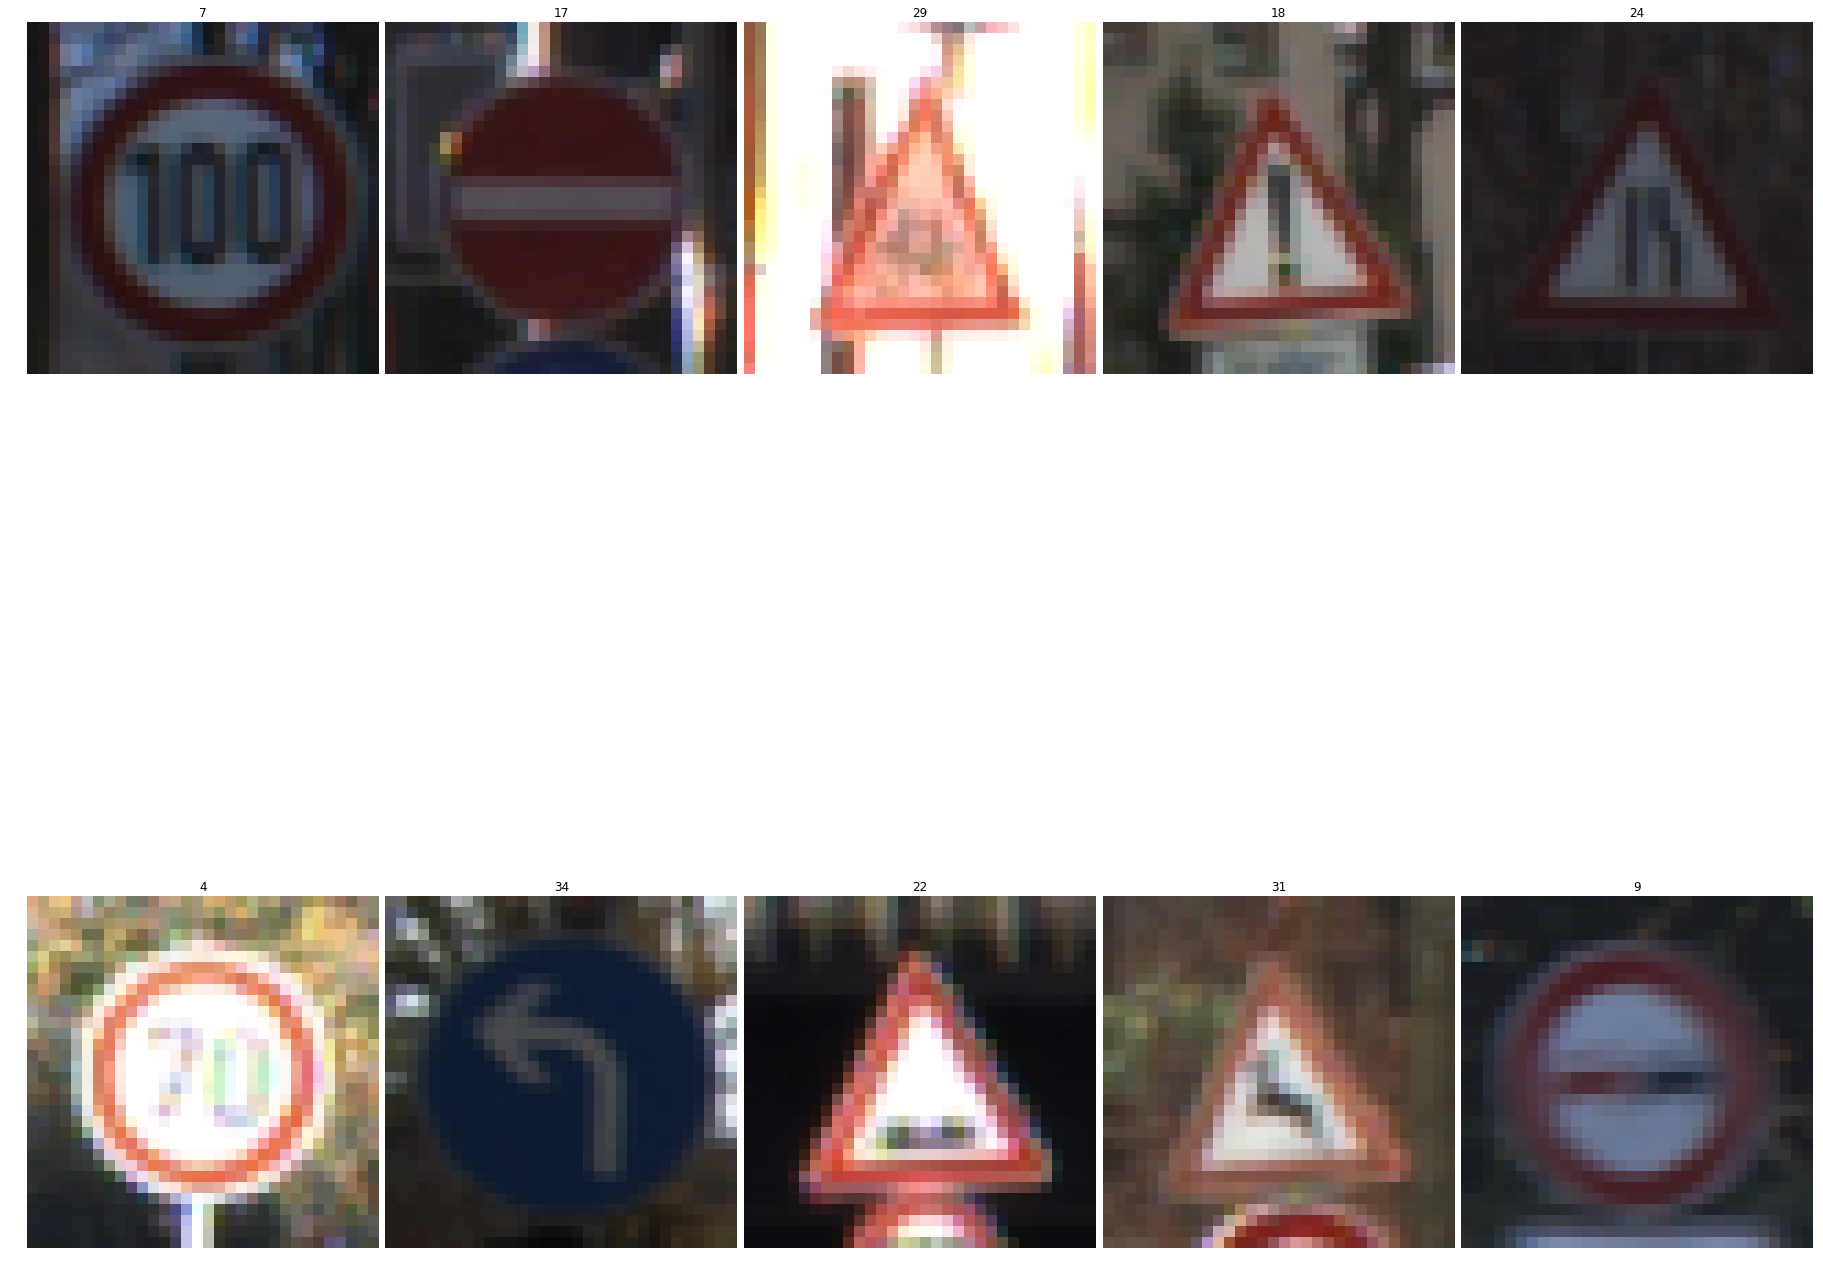

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random

# show image of 10 random data points
fig, axs = plt.subplots(2,5, figsize=(32, 32))
fig.subplots_adjust(hspace = .01, wspace=.02)
axs = axs.ravel()
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

## Note :  Convert input data from RGB to grayscale

In [4]:
# Convert to grayscale
X_train_rgb = X_train
X_train_gry = np.sum(X_train/3, axis=3, keepdims=True)


X_test_rgb = X_test
X_test_gry = np.sum(X_test/3, axis=3, keepdims=True)

X_valid_rgb = X_valid
X_valid_gry = np.sum(X_valid/3, axis=3, keepdims=True)

print('RGB shape:', X_train_rgb.shape)
print('Grayscale shape:', X_train_gry.shape)

X_train = X_train_gry
X_test = X_test_gry
X_valid = X_valid_gry

RGB shape: (34799, 32, 32, 3)
Grayscale shape: (34799, 32, 32, 1)


## Note :  Now we will normalize training and test  data to ensure we have Zero mean and equal Variance

In [5]:
print("Mean of Training Data : {}".format(np.mean(X_train)))
print("Mean of Test Data : {}".format(np.mean(X_test)))
#print("Mean of Valid Data : {}".format(np.mean(X_valid)))

## Normalize the train and test datasets to (-1,1)

X_train_normalized = (X_train - 128)/128
X_test_normalized = (X_test - 128)/128
#X_valid_normalized = (X_valid - 128)/128


print("Mean of Normalized Training Data : {}".format(np.mean(X_train_normalized)))
print("Mean of Normalized Test Data : {}".format(np.mean(X_test_normalized)))
#print("Mean of Normalized Valid Data : {}".format(np.mean(X_valid_normalized)))


X_train = X_train_normalized
X_test = X_test_normalized
#X_valid = X_valid_normalized
#X_valid = X_valid_normalized

Mean of Training Data : 82.67758903699634
Mean of Test Data : 82.14846036120173
Mean of Normalized Training Data : -0.35408133564846583
Mean of Normalized Test Data : -0.3582151534281105


Max of Normalized Data : 0.9921875
Max of Normalized Data : -0.9713541666666666
Original shape: (34799, 32, 32, 1)
Normalized shape: (34799, 32, 32, 1)
Train Shape: (34799, 32, 32, 1)
Test shape: (12630, 32, 32, 1)
Valid shape: (4410, 32, 32, 1)


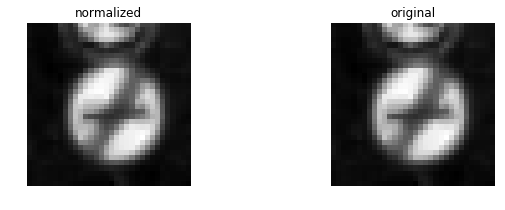

In [6]:
print("Max of Normalized Data : {}".format(np.max(X_train_normalized)))
print("Max of Normalized Data : {}".format(np.min(X_train_normalized)))
print("Original shape:", X_train.shape)
print("Normalized shape:", X_train_normalized.shape)
fig, axs = plt.subplots(1,2, figsize=(10, 3))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('normalized')
axs[0].imshow(X_train_normalized[0].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('original')
axs[1].imshow(X_train[0].squeeze(), cmap='gray')

print('Train Shape:', X_train.shape)
print('Test shape:', X_test.shape)
print('Valid shape:', X_valid.shape)

## Note : Identify given training data  frequency by label

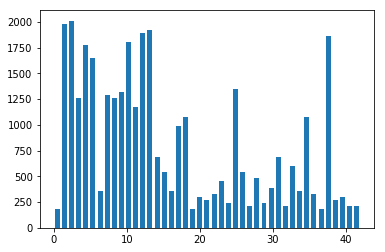

[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920  690
  540  360  990 1080  180  300  270  330  450  240 1350  540  210  480  240
  390  690  210  599  360 1080  330  180 1860  270  300  210  210]
minimum samples for any label: 180


In [7]:
# histogram of label frequency for training data
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
# histogram of label frequency (once again, before data augmentation)
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()
print(np.bincount(y_train))
print("minimum samples for any label:", min(np.bincount(y_train)))

## Note : Identify given Validataion set  frequency by label

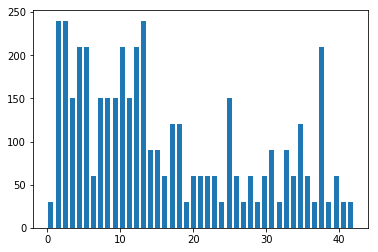

[ 30 240 240 150 210 210  60 150 150 150 210 150 210 240  90  90  60 120
 120  30  60  60  60  60  30 150  60  30  60  30  60  90  30  90  60 120
  60  30 210  30  60  30  30]
minimum samples for any label: 30


In [8]:
# histogram of label frequency for validation data
hist, bins = np.histogram(y_valid, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()
print(np.bincount(y_valid))
print("minimum samples for any label:", min(np.bincount(y_valid)))

## Note : Here we will augment data such that each class of input training data has a minimum of 800 samples.

In [9]:
print('X, y shapes:', X_train.shape, y_train.shape)

input_indices = []
output_indices = []

for class_n in range(n_classes):
    print(class_n, ': ', end='')
    class_indices = np.where(y_train == class_n)
    #print(class_indices[0])
    n_samples = len(class_indices[0])
    if n_samples < 800:
        for i in range(800 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train.shape[0])
            new_img = X_train[class_indices[0][i % n_samples]]
            #print(class_indices[0][i % n_samples])
            #new_img = random_translate(random_scaling(random_warp(random_brightness(new_img))))
            X_train = np.concatenate((X_train, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            if i % 50 == 0:
                print('|', end='')
            elif i % 10 == 0:
                print('-',end='')
    print('')
            
print('X, y shapes:', X_train.shape, y_train.shape)
X_train_save = X_train
y_train_save = y_train

X, y shapes: (34799, 32, 32, 1) (34799,)
0 : |----|----|----|----|----|----|----|----|----|----|----|----|-
1 : 
2 : 
3 : 
4 : 
5 : 
6 : |----|----|----|----|----|----|----|----|---
7 : 
8 : 
9 : 
10 : 
11 : 
12 : 
13 : 
14 : |----|----|
15 : |----|----|----|----|----|
16 : |----|----|----|----|----|----|----|----|---
17 : 
18 : 
19 : |----|----|----|----|----|----|----|----|----|----|----|----|-
20 : |----|----|----|----|----|----|----|----|----|----
21 : |----|----|----|----|----|----|----|----|----|----|--
22 : |----|----|----|----|----|----|----|----|----|-
23 : |----|----|----|----|----|----|----
24 : |----|----|----|----|----|----|----|----|----|----|----|
25 : 
26 : |----|----|----|----|----|
27 : |----|----|----|----|----|----|----|----|----|----|----|---
28 : |----|----|----|----|----|----|-
29 : |----|----|----|----|----|----|----|----|----|----|----|
30 : |----|----|----|----|----|----|----|----|
31 : |----|----|
32 : |----|----|----|----|----|----|----|----|----|----|----|-

## Note : Post data augmentation visualize training dataset  frequency by label

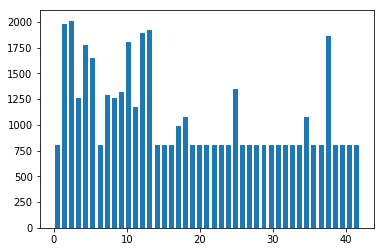

[ 800 1980 2010 1260 1770 1650  800 1290 1260 1320 1800 1170 1890 1920  800
  800  800  990 1080  800  800  800  800  800  800 1350  800  800  800  800
  800  800  800  800  800 1080  800  800 1860  800  800  800  800]
minimum samples for any label: 800


In [10]:
# histogram of label frequency for training data
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
# histogram of label frequency (once again, before data augmentation)
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()
print(np.bincount(y_train))
print("minimum samples for any label:", min(np.bincount(y_train)))

## Note : Shuffle the training data set  before we carve out a new validation set

In [11]:

## Shuffle the training dataset

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

print('done')

done


## Note : 20% of training data will be used for validating the accuracy of trained network. Hence seperating the required validation data from training set. i will rather use this validation set thant the one provided by Udacity. This validation set carved out from the training data will act as true representation of training data for effective training of network.

In [12]:
## Split validation dataset off from training dataset

from sklearn.model_selection import train_test_split

X_train_temp, X_valid_temp, y_train_temp, y_valid_temp = train_test_split(X_train, y_train, 
                                                                test_size=0.20, random_state=42)

print("Old X_train size:",len(X_train))
print("New X_train size:",len(X_train_temp))
print("X_validation size:",len(X_valid_temp))

Old X_train size: 46480
New X_train size: 37184
X_validation size: 9296


## Note : Post split of training data,  visualize remaining training dataset  frequency by label

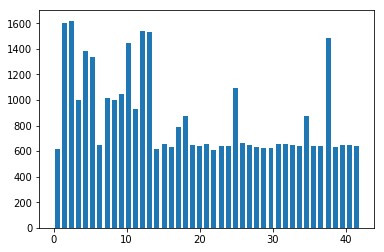

[ 613 1605 1620 1002 1386 1334  648 1017 1001 1049 1445  928 1538 1531  613
  653  632  787  874  646  643  657  610  639  639 1092  660  644  634  622
  626  656  653  644  642  877  637  637 1486  631  646  648  639]
minimum samples for any label: 610


In [13]:
hist, bins = np.histogram(y_train_temp, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()
print(np.bincount(y_train_temp))
print("minimum samples for any label:", min(np.bincount(y_train_temp)))

## Note : Visualize the frequency of new validation set , carved out from the training set.

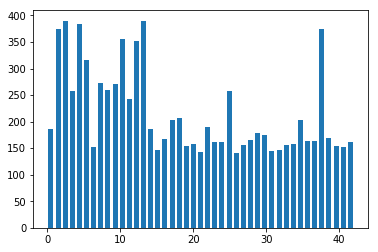

[187 375 390 258 384 316 152 273 259 271 355 242 352 389 187 147 168 203
 206 154 157 143 190 161 161 258 140 156 166 178 174 144 147 156 158 203
 163 163 374 169 154 152 161]
minimum samples for any label: 140


In [14]:
hist, bins = np.histogram(y_valid_temp, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()
print(np.bincount(y_valid_temp))
print("minimum samples for any label:", min(np.bincount(y_valid_temp)))

## Note : override the udacity provided validation set with the carved out validation set.

In [15]:
#X_valid = np.concatenate((X_valid, X_valid_temp), axis=0)
#y_valid = np.concatenate((y_valid, y_valid_temp), axis=0)
X_valid_copy = X_valid
y_valid_copy = y_valid

X_valid = X_valid_temp
y_valid = y_valid_temp

## Note:  Rotate arrays (pixels) of a percentage of input training data in an effort to better train the network  -- Change  parameter 'ROTMAT' to play with this. 

In [ ]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Randomly Rotate % of input images to improve training accuracy.
# rotmat will be a hyperparameter that can be tuned.
# Set ROTMAT to a vaue between 0 and 100
rotmat = 0

if rotmat > 100: 
   rotmat = 100
elif rotmat < 0:
    rotmat = 0

limit =  (int(len(X_train)*rotmat/100))

if rotmat > 0:
    for index in range(limit):
        X_train[index] = X_train[index][::-1]
print("Rotated: {} % of images".format(rotmat))


#image = X_train[0]
#plt.figure(figsize=(15,5))
#plt.imshow(image)
#print(y_train[0])
#y = X_train[0][::-1]
#rotateimage = y.squeeze()
#plt.figure(figsize=(15,5))
#plt.imshow(rotateimage)

## Note : Shuffle the training data set again

In [16]:
#shuffle the training data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

## Note : LeNet is Udacity supplied network architecture modified to handle RGB images with depth of "3"

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 40
BATCH_SIZE = 64

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Note : LeNetGry is Udacity supplied network architecture modified to handle GrayScale images with a deapth of "1"

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128
rate = 0.001

from tensorflow.contrib.layers import flatten

def LeNetGry(x):    
    
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Note : LeNet2 is a modified CovNet -  suggested by Pierre Sermanet and Yann Lecun

In [17]:
EPOCHS = 20
BATCH_SIZE = 128
rate = 0.001
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet2(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat_v2([xflat, layer2flat], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    # TODO: Activation.
    #logits = tf.nn.relu(x)

    #TODO: Layer 5: Fully Connected. Input = 120. Output = 84.
    #W5 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    #b5 = tf.Variable(tf.zeros(84)) 
    #x = tf.add(tf.matmul(x, W5), b5)
    
    # TODO: Activation.
    #x = tf.nn.relu(x)

    # TODO: Layer 6: Fully Connected. Input = 84. Output = 43.
    #W6 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    #b6 = tf.Variable(tf.zeros(43)) 
    #logits = tf.add(tf.matmul(x, W6), b6)
    
    return logits

print('done')

done


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

## Note : Taining the Model

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#x = tf.placeholder(tf.float32, (None, 32, 32, 3))
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)




In [19]:
#logits = LeNet(x)
#logits = LeNetGry(x)
logits = LeNet2(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
x shape: (?, 800)


In [20]:
rate = 0.001



correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [35]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.933

EPOCH 2 ...
Validation Accuracy = 0.972

EPOCH 3 ...
Validation Accuracy = 0.982

EPOCH 4 ...
Validation Accuracy = 0.990

EPOCH 5 ...
Validation Accuracy = 0.993

EPOCH 6 ...
Validation Accuracy = 0.995

EPOCH 7 ...
Validation Accuracy = 0.997

EPOCH 8 ...
Validation Accuracy = 0.996

EPOCH 9 ...
Validation Accuracy = 0.998

EPOCH 10 ...
Validation Accuracy = 0.998

EPOCH 11 ...
Validation Accuracy = 0.998

EPOCH 12 ...
Validation Accuracy = 0.999

EPOCH 13 ...
Validation Accuracy = 0.999

EPOCH 14 ...
Validation Accuracy = 0.999

EPOCH 15 ...
Validation Accuracy = 0.999

EPOCH 16 ...
Validation Accuracy = 0.999

EPOCH 17 ...
Validation Accuracy = 1.000

EPOCH 18 ...
Validation Accuracy = 1.000

EPOCH 19 ...
Validation Accuracy = 0.999

EPOCH 20 ...
Validation Accuracy = 1.000

Model saved


## Note: LeNET2 achieved a 99.9% accuracy after 20 epochs with a Learning Rate of 0.001 and batch size 128.  When tested with Test Dataset, the network accuracy was at 94.2%

In [43]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.936


In [42]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    validation_accuracy = evaluate(X_valid, y_valid)
    print("validation Accuracy = {:.3f}".format(validation_accuracy))

validation Accuracy = 1.000


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(8, 32, 32, 1)


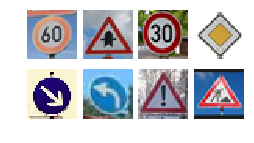

In [44]:
## Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Reinitialize and re-import if starting a new kernel here
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import cv2
#reading in an image
import glob
import matplotlib.image as mpimg

fig, axs = plt.subplots(2,4, figsize=(4, 2))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

my_images = []

for i, img in enumerate(glob.glob('./test_pics/*x.png')):
    image = cv2.imread(img)
    axs[i].axis('off')
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    my_images.append(image)

my_images = np.asarray(my_images)

my_images_gry = np.sum(my_images/3, axis=3, keepdims=True)

my_images_normalized = (my_images_gry - 128)/128 

print(my_images_normalized.shape)

### Predict the Sign Type for Each Image

In [45]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, './lenet')

    new_pics_classes = sess.run(logits, feed_dict={x: my_images_normalized, keep_prob : 1.0})
    #print(new_pics_classes)
    
    


### Analyze Performance

In [46]:
my_labels = [3, 11, 1, 12, 38, 34, 18, 25]


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(my_images_normalized, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

Test Set Accuracy = 0.875


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [47]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    predicts = sess.run(tf.nn.top_k(new_pics_classes, k=5, sorted=True))
    my_top_k = predicts
    
for i in range(len(predicts[0])):
    print('Image', i, 'probabilities:', predicts[0][i], '\n and predicted classes:', predicts[1][i])

Image 0 probabilities: [ 15.00885487   5.68927765   3.32468414   2.39536357   1.22245729] 
 and predicted classes: [ 3  2 25 23 31]
Image 1 probabilities: [ 50.19784927  31.10246849   2.30771112  -0.8203792   -0.88035679] 
 and predicted classes: [11 30 21 25 27]
Image 2 probabilities: [ 32.224823    18.80678749   3.97828841   2.21679807  -2.29284239] 
 and predicted classes: [1 2 3 5 0]
Image 3 probabilities: [ 41.22346115   3.12543797   2.51411724  -1.78240538  -3.54401612] 
 and predicted classes: [12 40 42 11  7]
Image 4 probabilities: [ 89.36756897  10.60931492  -2.6554482   -4.14733934  -6.65848923] 
 and predicted classes: [38  0  2 40  8]
Image 5 probabilities: [ 30.24516678  13.31952477   3.75277686   2.59103799   1.32703495] 
 and predicted classes: [34 38 28 15 36]
Image 6 probabilities: [ 50.1262207   13.43820667   6.00323153   2.42330599   2.00363088] 
 and predicted classes: [18 26 11 24 27]
Image 7 probabilities: [ 2.56840324  1.78362381  1.38213563  1.12917006 -1.691790

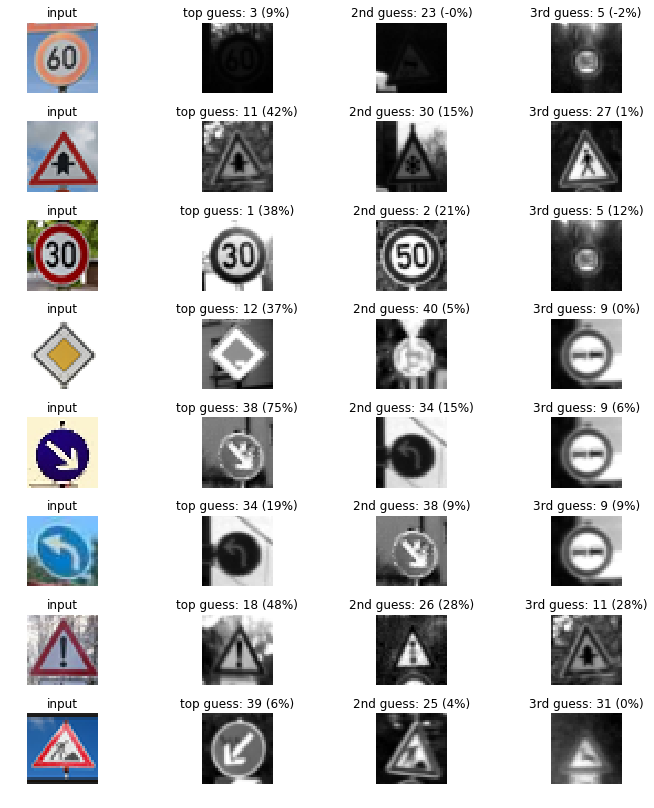

In [34]:
fig, axs = plt.subplots(len(my_images),4, figsize=(12, 14))
fig.subplots_adjust(hspace = .4, wspace=.2)
axs = axs.ravel()

for i, image in enumerate(my_images):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 1.00*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 1.00*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 1.00*my_top_k[0][i][2]))

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

Log

Training... 
Graystylel;Normalized;InputNotDistorted;Rate:0.001;BatchSize:128;Keep_Prob:0.5

EPOCH 1 ...
Validation Accuracy = 0.390

EPOCH 2 ...
Validation Accuracy = 0.637

EPOCH 3 ...
Validation Accuracy = 0.673

EPOCH 4 ...
Validation Accuracy = 0.749

EPOCH 5 ...
Validation Accuracy = 0.739

EPOCH 6 ...
Validation Accuracy = 0.797

EPOCH 7 ...
Validation Accuracy = 0.795

EPOCH 8 ...
Validation Accuracy = 0.744

EPOCH 9 ...
Validation Accuracy = 0.773

EPOCH 10 ...
Validation Accuracy = 0.811

EPOCH 11 ...
Validation Accuracy = 0.821

EPOCH 12 ...
Validation Accuracy = 0.806

EPOCH 13 ...
Validation Accuracy = 0.803

EPOCH 14 ...
Validation Accuracy = 0.765

EPOCH 15 ...
Validation Accuracy = 0.839

EPOCH 16 ...
Validation Accuracy = 0.844

EPOCH 17 ...
Validation Accuracy = 0.849

EPOCH 18 ...
Validation Accuracy = 0.871

EPOCH 19 ...
Validation Accuracy = 0.823

EPOCH 20 ...
Validation Accuracy = 0.808

EPOCH 21 ...
Validation Accuracy = 0.801

EPOCH 22 ...
Validation Accuracy = 0.802

EPOCH 23 ...
Validation Accuracy = 0.872

EPOCH 24 ...
Validation Accuracy = 0.868

EPOCH 25 ...
Validation Accuracy = 0.878

EPOCH 26 ...
Validation Accuracy = 0.804

EPOCH 27 ...
Validation Accuracy = 0.803

EPOCH 28 ...
Validation Accuracy = 0.820

EPOCH 29 ...
Validation Accuracy = 0.859

EPOCH 30 ...
Validation Accuracy = 0.880

EPOCH 31 ...
Validation Accuracy = 0.857

EPOCH 32 ...
Validation Accuracy = 0.839

EPOCH 33 ...
Validation Accuracy = 0.853

EPOCH 34 ...
Validation Accuracy = 0.793

EPOCH 35 ...
Validation Accuracy = 0.857

EPOCH 36 ...
Validation Accuracy = 0.868

EPOCH 37 ...
Validation Accuracy = 0.855

EPOCH 38 ...
Validation Accuracy = 0.839

EPOCH 39 ...
Validation Accuracy = 0.841

EPOCH 40 ...
Validation Accuracy = 0.827

Model saved


Training...
Graystylel;Normalized;InputAugmented;Rate:0.001;BatchSize:128;Keep_Prob:0.5
EPOCH 1 ...
Validation Accuracy = 0.492

EPOCH 2 ...
Validation Accuracy = 0.576

EPOCH 3 ...
Validation Accuracy = 0.574

EPOCH 4 ...
Validation Accuracy = 0.628

EPOCH 5 ...
Validation Accuracy = 0.559

EPOCH 6 ...
Validation Accuracy = 0.663

EPOCH 7 ...
Validation Accuracy = 0.629

EPOCH 8 ...
Validation Accuracy = 0.628

EPOCH 9 ...
Validation Accuracy = 0.666

EPOCH 10 ...
Validation Accuracy = 0.694

EPOCH 11 ...
Validation Accuracy = 0.692

EPOCH 12 ...
Validation Accuracy = 0.649

EPOCH 13 ...
Validation Accuracy = 0.671

EPOCH 14 ...
Validation Accuracy = 0.660

EPOCH 15 ...
Validation Accuracy = 0.697

EPOCH 16 ...
Validation Accuracy = 0.674

EPOCH 17 ...
Validation Accuracy = 0.716

EPOCH 18 ...
Validation Accuracy = 0.677

EPOCH 19 ...
Validation Accuracy = 0.697

EPOCH 20 ...
Validation Accuracy = 0.738

EPOCH 21 ...
Validation Accuracy = 0.718

EPOCH 22 ...
Validation Accuracy = 0.741

EPOCH 23 ...
Validation Accuracy = 0.714

EPOCH 24 ...
Validation Accuracy = 0.734

EPOCH 25 ...
Validation Accuracy = 0.710

EPOCH 26 ...
Validation Accuracy = 0.671

EPOCH 27 ...
Validation Accuracy = 0.707

EPOCH 28 ...
Validation Accuracy = 0.697

EPOCH 29 ...
Validation Accuracy = 0.741

EPOCH 30 ...
Validation Accuracy = 0.744

EPOCH 31 ...
Validation Accuracy = 0.744

EPOCH 32 ...
Validation Accuracy = 0.749

EPOCH 33 ...
Validation Accuracy = 0.740

EPOCH 34 ...
Validation Accuracy = 0.735

EPOCH 35 ...
Validation Accuracy = 0.811

EPOCH 36 ...
Validation Accuracy = 0.772

EPOCH 37 ...
Validation Accuracy = 0.795

EPOCH 38 ...
Validation Accuracy = 0.789

EPOCH 39 ...
Validation Accuracy = 0.788

EPOCH 40 ...
Validation Accuracy = 0.784

Model saved

Training...
Graystylel;Normalized;InputAugmented;Rate:0.001;BatchSize:128;Keep_Prob:0.5;discarded provided validation set and used one from training data
EPOCH 1 ...
Validation Accuracy = 0.764

EPOCH 2 ...
Validation Accuracy = 0.891

EPOCH 3 ...
Validation Accuracy = 0.929

EPOCH 4 ...
Validation Accuracy = 0.954

EPOCH 5 ...
Validation Accuracy = 0.961

EPOCH 6 ...
Validation Accuracy = 0.970

EPOCH 7 ...
Validation Accuracy = 0.976

EPOCH 8 ...
Validation Accuracy = 0.982

EPOCH 9 ...
Validation Accuracy = 0.984

EPOCH 10 ...
Validation Accuracy = 0.987

EPOCH 11 ...
Validation Accuracy = 0.990

EPOCH 12 ...
Validation Accuracy = 0.989

EPOCH 13 ...
Validation Accuracy = 0.992

EPOCH 14 ...
Validation Accuracy = 0.993

EPOCH 15 ...
Validation Accuracy = 0.992

EPOCH 16 ...
Validation Accuracy = 0.993

EPOCH 17 ...
Validation Accuracy = 0.994

EPOCH 18 ...
Validation Accuracy = 0.995

EPOCH 19 ...
Validation Accuracy = 0.996

EPOCH 20 ...
Validation Accuracy = 0.997

EPOCH 21 ...
Validation Accuracy = 0.997

EPOCH 22 ...
Validation Accuracy = 0.997

EPOCH 23 ...
Validation Accuracy = 0.997

EPOCH 24 ...
Validation Accuracy = 0.998

EPOCH 25 ...
Validation Accuracy = 0.997

EPOCH 26 ...
Validation Accuracy = 0.997

EPOCH 27 ...
Validation Accuracy = 0.999

EPOCH 28 ...
Validation Accuracy = 0.998

EPOCH 29 ...
Validation Accuracy = 0.997

EPOCH 30 ...
Validation Accuracy = 0.997

EPOCH 31 ...
Validation Accuracy = 0.997

EPOCH 32 ...
Validation Accuracy = 0.999

EPOCH 33 ...
Validation Accuracy = 0.998

EPOCH 34 ...
Validation Accuracy = 0.998

EPOCH 35 ...
Validation Accuracy = 0.998

EPOCH 36 ...
Validation Accuracy = 0.999

EPOCH 37 ...
Validation Accuracy = 0.998

EPOCH 38 ...
Validation Accuracy = 0.999

EPOCH 39 ...
Validation Accuracy = 0.999

EPOCH 40 ...
Validation Accuracy = 0.998

Model saved


    print("Model saved")
    
Training...
Graystylel;Normalized;InputAugmented and 10% of training data distorted;Rate:0.001;BatchSize:128;Keep_Prob:0.5;discarded provided validation set and used one from training data
EPOCH 1 ...
Validation Accuracy = 0.784

EPOCH 2 ...
Validation Accuracy = 0.882

EPOCH 3 ...
Validation Accuracy = 0.927

EPOCH 4 ...
Validation Accuracy = 0.950

EPOCH 5 ...
Validation Accuracy = 0.962

EPOCH 6 ...
Validation Accuracy = 0.971

EPOCH 7 ...
Validation Accuracy = 0.974

EPOCH 8 ...
Validation Accuracy = 0.979

EPOCH 9 ...
Validation Accuracy = 0.980

EPOCH 10 ...
Validation Accuracy = 0.983

EPOCH 11 ...
Validation Accuracy = 0.983

EPOCH 12 ...
Validation Accuracy = 0.982

EPOCH 13 ...
Validation Accuracy = 0.988

EPOCH 14 ...
Validation Accuracy = 0.990

EPOCH 15 ...
Validation Accuracy = 0.989

EPOCH 16 ...
Validation Accuracy = 0.991

EPOCH 17 ...
Validation Accuracy = 0.993

EPOCH 18 ...
Validation Accuracy = 0.992

EPOCH 19 ...
Validation Accuracy = 0.992

EPOCH 20 ...
Validation Accuracy = 0.993

EPOCH 21 ...
Validation Accuracy = 0.994

EPOCH 22 ...
Validation Accuracy = 0.993

EPOCH 23 ...
Validation Accuracy = 0.994

EPOCH 24 ...
Validation Accuracy = 0.994

EPOCH 25 ...
Validation Accuracy = 0.995

EPOCH 26 ...
Validation Accuracy = 0.995

EPOCH 27 ...
Validation Accuracy = 0.995

EPOCH 28 ...
Validation Accuracy = 0.995

EPOCH 29 ...
Validation Accuracy = 0.995

EPOCH 30 ...
Validation Accuracy = 0.995

EPOCH 31 ...
Validation Accuracy = 0.996

EPOCH 32 ...
Validation Accuracy = 0.995

EPOCH 33 ...
Validation Accuracy = 0.995

EPOCH 34 ...
Validation Accuracy = 0.996

EPOCH 35 ...
Validation Accuracy = 0.996

EPOCH 36 ...
Validation Accuracy = 0.996

EPOCH 37 ...
Validation Accuracy = 0.995

EPOCH 38 ...
Validation Accuracy = 0.997

EPOCH 39 ...
Validation Accuracy = 0.997

EPOCH 40 ...
Validation Accuracy = 0.998

Model saved

Training...
Graystylel;Normalized;InputAugmented and 20% of training data distorted;Rate:0.001;BatchSize:128;Keep_Prob:0.5;discarded provided validation set and used one from training data
EPOCH 1 ...
Validation Accuracy = 0.607

EPOCH 2 ...
Validation Accuracy = 0.825

EPOCH 3 ...
Validation Accuracy = 0.888

EPOCH 4 ...
Validation Accuracy = 0.918

EPOCH 5 ...
Validation Accuracy = 0.940

EPOCH 6 ...
Validation Accuracy = 0.949

EPOCH 7 ...
Validation Accuracy = 0.956

EPOCH 8 ...
Validation Accuracy = 0.958

EPOCH 9 ...
Validation Accuracy = 0.970

EPOCH 10 ...
Validation Accuracy = 0.969

EPOCH 11 ...
Validation Accuracy = 0.975

EPOCH 12 ...
Validation Accuracy = 0.974

EPOCH 13 ...
Validation Accuracy = 0.975

EPOCH 14 ...
Validation Accuracy = 0.981

EPOCH 15 ...
Validation Accuracy = 0.981

EPOCH 16 ...
Validation Accuracy = 0.984

EPOCH 17 ...
Validation Accuracy = 0.985

EPOCH 18 ...
Validation Accuracy = 0.986

EPOCH 19 ...
Validation Accuracy = 0.988

EPOCH 20 ...
Validation Accuracy = 0.987

EPOCH 21 ...
Validation Accuracy = 0.988

EPOCH 22 ...
Validation Accuracy = 0.990

EPOCH 23 ...
Validation Accuracy = 0.989

EPOCH 24 ...
Validation Accuracy = 0.991

EPOCH 25 ...
Validation Accuracy = 0.991

EPOCH 26 ...
Validation Accuracy = 0.991

EPOCH 27 ...
Validation Accuracy = 0.991

EPOCH 28 ...
Validation Accuracy = 0.990

EPOCH 29 ...
Validation Accuracy = 0.991

EPOCH 30 ...
Validation Accuracy = 0.993

EPOCH 31 ...
Validation Accuracy = 0.991

EPOCH 32 ...
Validation Accuracy = 0.993

EPOCH 33 ...
Validation Accuracy = 0.992

EPOCH 34 ...
Validation Accuracy = 0.992

EPOCH 35 ...
Validation Accuracy = 0.994

EPOCH 36 ...
Validation Accuracy = 0.993

EPOCH 37 ...
Validation Accuracy = 0.993

EPOCH 38 ...
Validation Accuracy = 0.993

EPOCH 39 ...
Validation Accuracy = 0.993

EPOCH 40 ...
Validation Accuracy = 0.994

Model saved

Training...
Graystylel;Normalized;InputAugmented and 0% of training data distorted;Rate:0.001;BatchSize:128;Keep_Prob:0.5;discarded provided validation set and used one from training data,Lenet2
EPOCH 1 ...
Validation Accuracy = 0.934

EPOCH 2 ...
Validation Accuracy = 0.972

EPOCH 3 ...
Validation Accuracy = 0.985

EPOCH 4 ...
Validation Accuracy = 0.991

EPOCH 5 ...
Validation Accuracy = 0.994

EPOCH 6 ...
Validation Accuracy = 0.995

EPOCH 7 ...
Validation Accuracy = 0.997

EPOCH 8 ...
Validation Accuracy = 0.997

EPOCH 9 ...
Validation Accuracy = 0.998

EPOCH 10 ...
Validation Accuracy = 0.998

EPOCH 11 ...
Validation Accuracy = 0.999

EPOCH 12 ...
Validation Accuracy = 0.999

EPOCH 13 ...
Validation Accuracy = 0.999

EPOCH 14 ...
Validation Accuracy = 0.999

EPOCH 15 ...
Validation Accuracy = 0.999

EPOCH 16 ...
Validation Accuracy = 0.999

EPOCH 17 ...
Validation Accuracy = 1.000

EPOCH 18 ...
Validation Accuracy = 1.000

EPOCH 19 ...
Validation Accuracy = 1.000

EPOCH 20 ...
Validation Accuracy = 1.000

Model saved